In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [23]:
pitchers = pd.read_csv('c:\\Users\\josep\\Portfolio\\DS6021\\DS6021-Project\\data\\cleaned\\final_pitchers_df.csv')

In [24]:
pitchers.head().T

,0,1,2,3,4
row_id,abbotpa01_2003,almanar01_2003,almoned01_2003,alvarwi01_2003,batismi01_2003
playerID,abbotpa01,almanar01,almoned01,alvarwi01,batismi01
year,2003,2003,2003,2003,2003
position,P,P,P,P,P
age,36,31,27,33,32
avg_salary_year,2573472.948005,2573472.948005,2573472.948005,2573472.948005,2573472.948005
free_agent_salary,600000.0,500000.0,NaN,1500000.0,4366666.666667
contract_length,1.0,1.0,1.0,1.0,3.0
W,19.0,9.0,0.0,8.0,29.0
L,9.0,9.0,0.0,5.0,26.0


In [25]:
pitchers['won_mvp'] = pitchers['won_mvp'].astype('category')
pitchers['won_gold_glove'] = pitchers['won_gold_glove'].astype('category')
pitchers['won_cy_young'] = pitchers['won_cy_young'].astype('category')
pitchers['position'] = pitchers['position'].astype('category')
pitchers['won_silver_slugger'] = pitchers['won_silver_slugger'].astype('category')
pitchers['all_star'] = pitchers['all_star'].astype('category')

## Feature Selection - Lasso Regression

In [26]:
X = pitchers.drop(columns=["row_id", "playerID","year",'position',"free_agent_salary","ZR"])
y = pitchers["free_agent_salary"]
df_xy = pd.concat([X, y], axis=1)

df_xy = df_xy.dropna()

X = df_xy.drop(columns=[y.name])
y = df_xy[y.name]

In [27]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

In [28]:
alphas = np.logspace(-4, 4, 400)

In [29]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

In [30]:
lasso = Pipeline([
    ("prep", preprocess),
    ("scale", StandardScaler()),
    ("model", LassoCV(alphas=alphas, cv=10, random_state=0))
])

In [31]:
lasso.fit(X, y)

c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.408e+12, tolerance: 8.338e+11
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+13, tolerance: 8.338e+11
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing

,steps,"[('prep', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


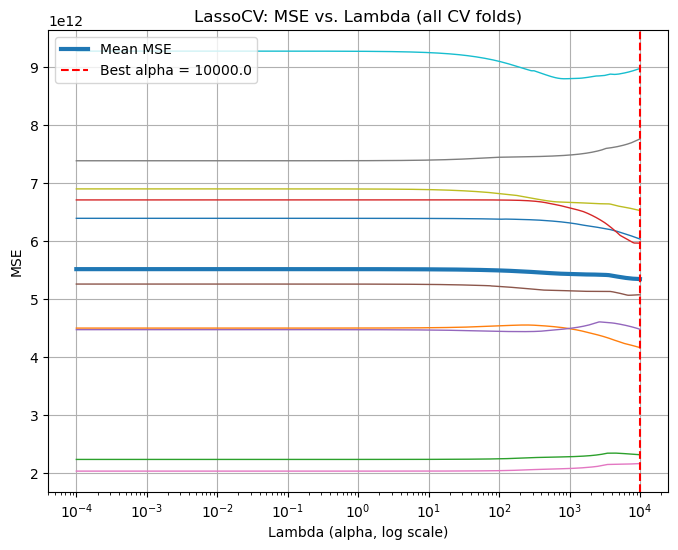

In [32]:

model = lasso.named_steps["model"]

alphas = model.alphas_
mse_path = model.mse_path_

plt.figure(figsize=(8,6))

for i in range(mse_path.shape[1]):
    plt.plot(alphas, mse_path[:, i], linewidth=1)

plt.plot(alphas, mse_path.mean(axis=1), linewidth=3, label='Mean MSE')

plt.axvline(model.alpha_, color='red', linestyle='--', label=f'Best alpha = {model.alpha_}')

plt.xscale('log')
plt.xlabel("Lambda (alpha, log scale)")
plt.ylabel("MSE")
plt.title("LassoCV: MSE vs. Lambda (all CV folds)")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Build the feature names
num_original = list(num_cols)
num_squared = [f"{c}^2" for c in num_cols]

# Get OHE names
ohe = lasso.named_steps["prep"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()

all_features = num_original + cat_feature_names


In [34]:
coef = lasso.named_steps["model"].coef_

selected_features = [name for name, c in zip(all_features, coef) if c != 0]
selected_features
missing = [f for f in X if f not in selected_features]


In [35]:
missing

['L',
 'GS',
 'H',
 'BFP',
 'R',
 'E',
 'PB',
 'WP.1',
 'won_cy_young',
 'won_mvp',
 'won_gold_glove',
 'won_silver_slugger',
 'all_star']

## Linear Regression

In [36]:
pitchers_clean = pitchers.dropna(subset=["free_agent_salary"])
X = pitchers_clean.drop(columns=["row_id", "playerID","year","free_agent_salary",
                          "ZR","position","PB","L","GS","H","BFP","R","E","PB","WP.1", "all_star",
                          "won_cy_young","won_mvp","won_gold_glove","won_silver_slugger"])
y = pitchers_clean["free_agent_salary"]

# 2) Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Identify numeric and categorical columns
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# 4) Preprocessing pipeline (impute + OHE + scaling)
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols)
    ],
    remainder="drop",
    sparse_threshold=0
)

full_pipeline = Pipeline([
    ("pre", preprocessor),
    ("scale", StandardScaler())
])

# 5) Fit pipeline on training data
full_pipeline.fit(X_train_raw)

# 6) Transform train and test sets
X_train_trans = full_pipeline.transform(X_train_raw)
X_test_trans  = full_pipeline.transform(X_test_raw)

# 7) Generate correct feature names
# numeric names
num_names = num_cols
# categorical names from OneHotEncoder

all_feature_names = num_names

# 8) Convert transformed arrays to DataFrames with correct column names
X_train_df = pd.DataFrame(X_train_trans, columns=all_feature_names, index=X_train_raw.index)
X_test_df  = pd.DataFrame(X_test_trans,  columns=all_feature_names, index=X_test_raw.index)

# 9) Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train_df, y_train)

# 10) Predict and evaluate
y_pred = lr.predict(X_test_df)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.5f}")
print(f"Test R^2: {r2:.5f}")

# 11) Coefficient DataFrame
coef_df = pd.DataFrame({"feature": all_feature_names, "coefficient": lr.coef_})
print(coef_df.sort_values("coefficient", key=lambda s: s.abs(), ascending=False).head(20))

# 12) Optional: statsmodels OLS summary
X_train_sm = sm.add_constant(X_train_df)
ols_res = sm.OLS(y_train, X_train_sm).fit()
print(ols_res.summary())

Test MSE: 4147750688097.67773
Test R^2: 0.70624
            feature   coefficient
22          InnOuts  4.827099e+06
8                ER -3.702027e+06
2   contract_length  1.819953e+06
11               SO  1.533892e+06
7                SV  9.122751e+05
4                 G -6.950615e+05
10               BB -6.361752e+05
24                A  6.150984e+05
14              HBP -5.287832e+05
17               SH -4.393849e+05
9                HR -3.884018e+05
1   avg_salary_year  3.549312e+05
20              ERA  3.531045e+05
3                 W  2.944886e+05
13               WP  2.824707e+05
5                CG -2.375341e+05
18               SF -1.932499e+05
16               GF -1.844556e+05
19             GIDP  1.526064e+05
25               DP  1.210590e+05
                            OLS Regression Results                            
Dep. Variable:      free_agent_salary   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.782
M

## Assumptions

In [37]:
residuals = ols_res.resid
fitted = ols_res.fittedvalues

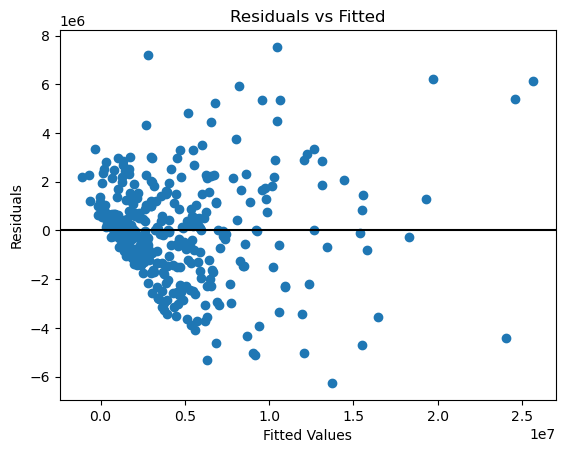

In [38]:
plt.scatter(fitted, residuals)
plt.axhline(0, color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

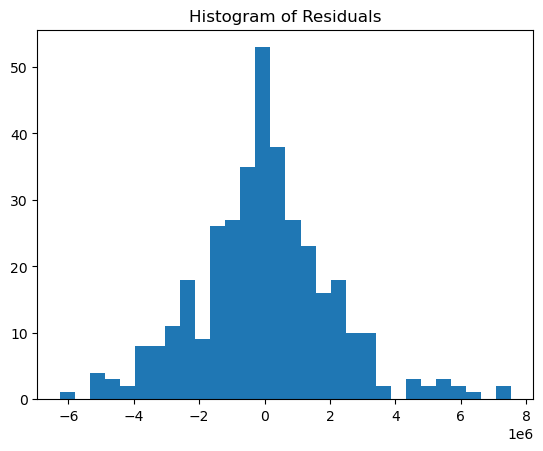

In [39]:
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

## Actual vs Predicted

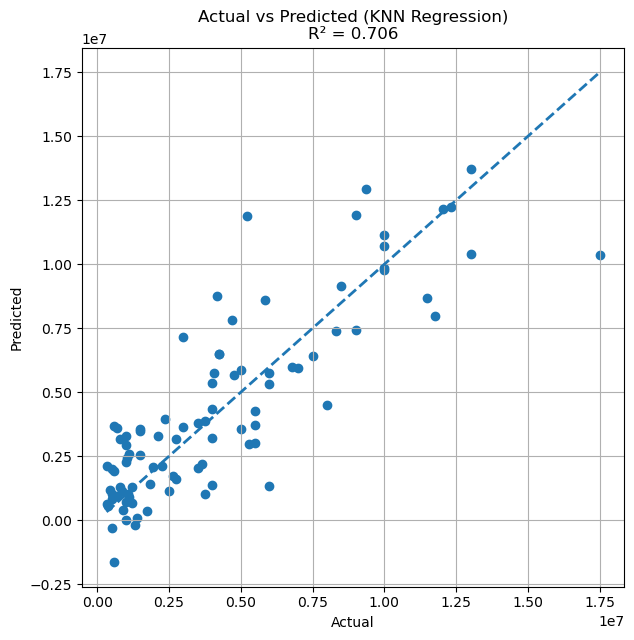

In [40]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted (KNN Regression)\nR² = {r2:.3f}")
plt.grid(True)
plt.show()